In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
# import load model and save model
from tensorflow.keras.models import load_model, save_model, model_from_json, model_from_yaml
import os
import random
import time

2024-03-20 05:57:40.804201: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-20 05:57:40.804232: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-20 05:57:40.805124: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-20 05:57:40.812087: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-20 05:57:41.871401: W tensorflow/compiler/tf2

In [10]:
# load the pictures from clothes folder
clothes_folder = os.path.join("/home/naveedali/Desktop/ML1 Internship/Day 12 task/Clothes")
# list the files in the folder
clothes_files = os.listdir(clothes_folder)
# print the list of files
print(clothes_files)

# load the pictures from clothes folder
modelsfolder = os.path.join("/home/naveedali/Desktop/ML1 Internship/Day 12 task/Models")
# list the files in the folder
modelsfiles = os.listdir(modelsfolder)
# print the list of files
#print(modelsfiles)


# load the pictures from clothes folder
trashfolder = os.path.join("/home/naveedali/Desktop/ML1 Internship/Day 12 task/Trash")
# list the files in the folder
trashfiles = os.listdir(trashfolder)
# print the list of files
#print(trashfiles)

['2413_1.jpg', '2445_1.jpg', '2071_1.jpg', '2217_5.jpg', '2056_8.jpg', '2276_5.jpg', '2450_6.jpg', '2303_4.jpg', '2303_3.jpg', '2105_2.jpg', '2290_5.jpg', '2430_5.jpg', '2024_2.jpg', '2450_4.jpg', '2025_3.jpg', '2383_5.jpg', '2325_6.jpg', '2303_5.jpg', '2195_1.jpg', '2039_2.jpg', '2159_1.jpg', '2196_5.jpg', '2070_7.jpg', '2231_5.jpg', '2118_8.jpg', '2179_2.jpg', '2333_7.jpg', '2443_6.jpg', '2353_3.jpg', '2153_7.jpg', '2145_7.jpg', '2249_10.jpg', '2271_3.jpg', '2232_1.jpg', '2426_8.jpg', '2383_1.jpg', '2179_7.jpg', '2403_1.jpg', '2072_5.jpg', '2325_5.jpg', '2413_5.jpg', '2440_1.jpg', '2293_2.jpg', '2369_8.jpg', '2054_2.jpg', '2251_6.jpg', '2398_6.jpg', '2390_6.jpg', '2293_1.jpg', '2109_7.jpg', '2276_2.jpg', '2352_7.jpg', '2271_6.jpg', '2406_2.jpg', '2280_1.jpg', '2037_8.jpg', '2304_5.jpg', '2245_7.jpg', '2061_6.jpg', '2153_2.jpg', '2200_7.jpg', '2450_5.jpg', '2146_5.jpg', '2242_8.jpg', '2030_2.jpg', '2041_8.jpg', '2295_1.jpg', '2393_5.jpg', '2427_1.jpg', '2329_1.jpg', '2035_7.jpg', '235

In [11]:
# now store the images in a list, their paths in a list and assign them label 0
images = []
images_path = []
labels = []
for file in clothes_files:
    images_path.append(os.path.join(clothes_folder, file))
    images.append(tf.keras.preprocessing.image.load_img(os.path.join(clothes_folder, file), target_size=(227, 227)))
    labels.append(0)


for file in modelsfiles:
    images_path.append(os.path.join(modelsfolder, file))
    images.append(tf.keras.preprocessing.image.load_img(os.path.join(modelsfolder, file), target_size=(227, 227)))
    labels.append(1)
    
    
for file in trashfiles:
    images_path.append(os.path.join(trashfolder, file))
    images.append(tf.keras.preprocessing.image.load_img(os.path.join(trashfolder, file), target_size=(227, 227)))
    labels.append(2)

In [13]:
# create a csv using these lists 
import pandas as pd 
data = {'Images': images, 'Labels': labels, 'Images Path': images_path}
df = pd.DataFrame(data)
df.to_csv('images.csv', index=False)
# now load the csv
df = pd.read_csv('images.csv')
# print the dataframe
df.head()

,Images,Labels,Images Path
0,<PIL.Image.Image image mode=RGB size=227x227 a...,0,/home/naveedali/Desktop/ML1 Internship/Day 12 ...
1,<PIL.Image.Image image mode=RGB size=227x227 a...,0,/home/naveedali/Desktop/ML1 Internship/Day 12 ...
2,<PIL.Image.Image image mode=RGB size=227x227 a...,0,/home/naveedali/Desktop/ML1 Internship/Day 12 ...
3,<PIL.Image.Image image mode=RGB size=227x227 a...,0,/home/naveedali/Desktop/ML1 Internship/Day 12 ...
4,<PIL.Image.Image image mode=RGB size=227x227 a...,0,/home/naveedali/Desktop/ML1 Internship/Day 12 ...


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Images       351 non-null    object
 1   Labels       351 non-null    int64 
 2   Images Path  351 non-null    object
dtypes: int64(1), object(2)
memory usage: 8.4+ KB


In [15]:
# shuffle the dataset 
df = df.sample(frac=1).reset_index(drop=True)
# print the dataframe
df.head()

,Images,Labels,Images Path
0,<PIL.Image.Image image mode=RGB size=227x227 a...,2,/home/naveedali/Desktop/ML1 Internship/Day 12 ...
1,<PIL.Image.Image image mode=RGB size=227x227 a...,0,/home/naveedali/Desktop/ML1 Internship/Day 12 ...
2,<PIL.Image.Image image mode=RGB size=227x227 a...,2,/home/naveedali/Desktop/ML1 Internship/Day 12 ...
3,<PIL.Image.Image image mode=RGB size=227x227 a...,2,/home/naveedali/Desktop/ML1 Internship/Day 12 ...
4,<PIL.Image.Image image mode=RGB size=227x227 a...,0,/home/naveedali/Desktop/ML1 Internship/Day 12 ...


In [16]:
# now we will load the model best.keras 
model = load_model("/home/naveedali/Desktop/ML1 Internship/Day 12 task/best.keras")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 217, 217, 96)      34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 72, 72, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 68, 68, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 22, 22, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 18, 18, 384)       1

In [18]:
# now we will train this model again on our dataset
# first we will split the dataset into train and test
from sklearn.model_selection import train_test_split
# given the image, we have to predict the label
X = df['Images Path']
y = df['Labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(280,) (71,) (280,) (71,)


In [19]:
# now we will create a data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create a data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
# create a train generator
train_generator = datagen.flow_from_dataframe(df, x_col='Images Path', y_col='Labels', subset='training', target_size=(227, 227), class_mode='raw')
# create a validation generator
val_generator = datagen.flow_from_dataframe(df, x_col='Images Path', y_col='Labels', subset='validation', target_size=(227, 227), class_mode='raw')
# now we will train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, validation_data=val_generator, epochs=10)


Found 281 validated image filenames.
Found 70 validated image filenames.
Epoch 1/10
9/9 [==============================] - 79s 9s/step - loss: 1.1229 - accuracy: 0.3843 - val_loss: 1.1247 - val_accuracy: 0.3143
Epoch 2/10
9/9 [==============================] - 86s 10s/step - loss: 0.9683 - accuracy: 0.5480 - val_loss: 0.6505 - val_accuracy: 0.7714
Epoch 3/10
9/9 [==============================] - 70s 8s/step - loss: 0.6827 - accuracy: 0.7260 - val_loss: 0.6891 - val_accuracy: 0.7143
Epoch 4/10
9/9 [==============================] - 73s 8s/step - loss: 0.5354 - accuracy: 0.7758 - val_loss: 0.5781 - val_accuracy: 0.7857
Epoch 5/10
9/9 [==============================] - 76s 8s/step - loss: 0.4744 - accuracy: 0.8221 - val_loss: 0.3784 - val_accuracy: 0.8571
Epoch 6/10
9/9 [==============================] - 72s 8s/step - loss: 0.3445 - accuracy: 0.8861 - val_loss: 0.4295 - val_accuracy: 0.8571
Epoch 7/10
9/9 [==============================] - 77s 8s/step - loss: 0.3691 - accuracy: 0.8577 - 

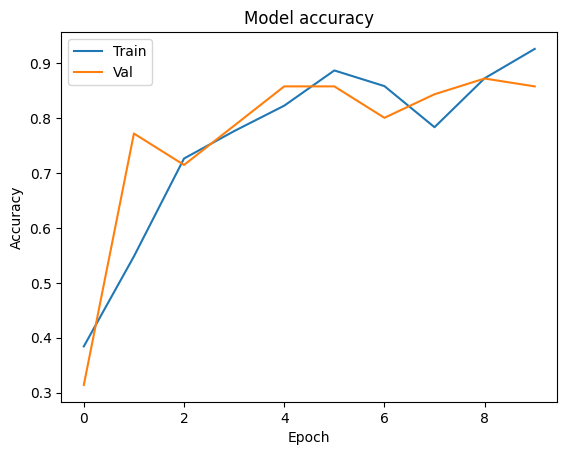

In [24]:
# plot the training and validation accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [42]:
# take a picture and test it 
pic = cv2.imread('hello.jpg')
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
pic = cv2.resize(pic, (227, 227))
pic = np.array(pic)
pic = np.expand_dims(pic, axis=0)
#print(pic)

# now we will predict the class of the image
prediction = model.predict(pic)
print(prediction)
# get the class with the highest probability
print(np.argmax(prediction))

1/1 [==============================] - 0s 128ms/step
[[0. 1. 0.]]
1


In [43]:
# save the model and history 
model.save('finetuned.keras')
import pickle
with open('history.pkl', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)